In [2]:
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

from sympy import *
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# NEWTON
-----------------

In [22]:
epsilon = 10e-5

def newtonsUpdate(xk, deriv1, H):
    """
        xk:    : Current value 
        deriv1 : 1st order derivative
        H      : Hessian matrix (2nd order derivative)
        
        pk (Search direction) = - inv(H).deriv1_xk 
    """
#     print (H, type(H))
    alpha = np.linalg.inv(H)
    pk = -1 * deriv1
#     pk = np.dot(alpha,  deriv1)
    xk1 = xk - np.dot(alpha,  deriv1)
    return xk1, alpha, pk


def iterate(f, xk, deriv_1, H, numFeatures, numSteps, should_print):
    fx_array = []
    gradientNorm_arr = []
    alpha_arr = []
    pk_arr = []
    xk1_arr = []
    for step in range(numSteps): 
        if numFeatures == 3:
            fx = f.evalf(subs={x1:xk[0], x2:xk[1], x3:xk[2]})
            gradient_xk = np.array([eq.evalf(subs={x1:xk[0], x2:xk[1], x3:xk[2]}) for eq in deriv_1], 
                                   dtype=float)      

            H_lv = np.array([cell.evalf(subs={x1:xk[0], x2:xk[1], x3:xk[2]}) 
                          for rows in H
                          for cell in rows], dtype='float32').reshape(3,3)
        elif numFeatures == 2:
            fx = f.evalf(subs={x1:xk[0], x2:xk[1]})
            gradient_xk = np.array([eq.evalf(subs={x1:xk[0], x2:xk[1]}) for eq in deriv_1], 
                                   dtype=float)
            H_lv = np.array([cell.evalf(subs={x1:xk[0], x2:xk[1]}) 
                          for rows in H
                          for cell in rows], dtype='float64').reshape(2,2)
        else:
            raise ValueError('Num Features doesnt match the handled condition')
            
        print ('#######################&&&&&&&&&&&& ', H_lv)
        fx_array.append(fx)
        gradientNorm = np.linalg.norm(gradient_xk)
        gradientNorm_arr.append(gradientNorm)
        
        if should_print:
            if (step+1)%should_print == 0:
                print('')
                print ('##########################################################')
                print ('Function F at x: f(x) ', fx)
                print ('Gradient at xk%s is: '%str(step), gradient_xk)
                print ("####### Gradient Norm: ", gradientNorm)
                print('The updated Value xk%s is \n'%(step+1), xk)
        
        if ((gradientNorm/(1+np.abs(fx))) <= epsilon) or (step == 1000):
            print('The check (gradient norm equation reach a val < epsilon, HENCE BREAKING OUT OF LOOP)')
            break
            
        xk1, alpha, pk = newtonsUpdate(xk, deriv1=gradient_xk, H=H_lv)
        xk = xk1
        
        pk_arr.append(pk)
        alpha_arr.append(alpha)
        xk1_arr.append(xk1)
        
    return fx_array, gradientNorm_arr, pk_arr, alpha_arr, xk1_arr




def plot(subplotArr, rows=1, columns=2, figsize=(10, 3), contour=False):
    fig1, axs = plt.subplots(rows,columns, figsize=figsize, facecolor='w', edgecolor='k')
    if columns>1:
        axs = axs.ravel()
    for no, arrVal in enumerate(subplotArr):
        if no == 0 and contour:
            x1 = subplotArr[0]["x1"]
            x2 = subplotArr[0]['x2']
            z = subplotArr[0]['z']
            sol_x1 = subplotArr[0]['sol_x1']
            sol_x2 = subplotArr[0]['sol_x2']
            axs[no].contourf(x1,x2,z)
            axs[no].plot(sol_x1, sol_x2, 'r')
            axs[no].set_title('Contour Plot for the function')
        elif no == 0 and not contour:
            axs[no].plot(np.arange(len(subplotArr[0]["functionVal"])), subplotArr[0]["functionVal"])
            axs[no].set_xlabel('num of Iteration')
            axs[no].set_ylabel('Function f(x) at step')
            axs[no].set_title('Function Vs Num Iteration')
        else:
            axs[no].plot(np.arange(len(subplotArr[1]["gradientNorm"])), subplotArr[1]["gradientNorm"])
#             axs[no].plot(np.arange(len(arrVal)), arrVal)
            axs[no].set_xlabel('num of Iteration')
            axs[no].set_ylabel('Gradient Norm at step')
            axs[no].set_title('Gradient Norm Vs Num Iteration')
            
    plt.show()

# Newtons Method:

# Solution d(1)

[2*x1 2*x2 2*x3]
[[2 0 0]
 [0 2 0]
 [0 0 2]]
#######################&&&&&&&&&&&&  [[ 2.  0.  0.]
 [ 0.  2.  0.]
 [ 0.  0.  2.]]

##########################################################
Function F at x: f(x)  3.00000000000000
Gradient at xk0 is:  [ 2.  2.  2.]
####### Gradient Norm:  3.46410161514
The updated Value xk1 is 
 [1 1 1]
#######################&&&&&&&&&&&&  [[ 2.  0.  0.]
 [ 0.  2.  0.]
 [ 0.  0.  2.]]

##########################################################
Function F at x: f(x)  0.e-125
Gradient at xk1 is:  [ 0.  0.  0.]
####### Gradient Norm:  0.0
The updated Value xk2 is 
 [ 0.  0.  0.]
The check (gradient norm equation reach a val < epsilon, HENCE BREAKING OUT OF LOOP)


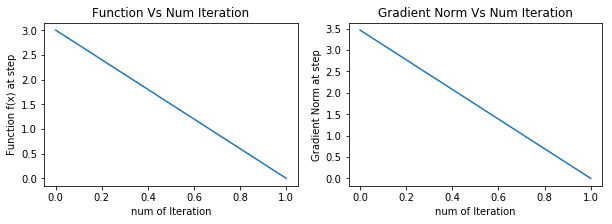

,pk,xk
0,"[-2.0, -2.0, -2.0]","[0.0, 0.0, 0.0]"


In [23]:
x1 = Symbol('x1')
x2 = Symbol('x2')
x3 = Symbol('x3')
f = pow(x1,2) + pow(x2,2) + pow(x3,2)
deriv_1 = np.array([f.diff(x1), f.diff(x2), f.diff(x3)])
H = np.array([d_eq.diff(xn) for d_eq in deriv_1 for xn in [x1,x2,x3]]).reshape(3,3)
print(deriv_1)
print (H)

xk = np.array([1,1,1])

# fx_array, gradientNorm_arr = iterate(f, xk, deriv_1, H, numFeatures=3, numSteps=10, should_print=1)

fx_array, gradientNorm_arr, pk_arr, alpha_arr, xk1_arr = iterate(f, xk, deriv_1, H, numFeatures=3, 
                                                                 numSteps=10, should_print=1)
outData = pd.DataFrame(columns=["pk","xk"])
outData["pk"] = pk_arr
# outData["alpha"] = alpha_arr
outData["xk"] = xk1_arr

plot([dict(functionVal = fx_array), dict(gradientNorm = gradientNorm_arr)])

outData

# Solution d(2)

#######################&&&&&&&&&&&&  [[ 2. -2.]
 [-2.  4.]]

##########################################################
Function F at x: f(x)  0.e-125
Gradient at xk0 is:  [  1.18182126e-125  -2.00000000e+000]
####### Gradient Norm:  2.0
The updated Value xk1 is 
 [0 0]
#######################&&&&&&&&&&&&  [[ 2. -2.]
 [-2.  4.]]

##########################################################
Function F at x: f(x)  -1.00000000000000
Gradient at xk1 is:  [  4.72728505e-125   9.45457010e-125]
####### Gradient Norm:  1.0570530726e-124
The updated Value xk2 is 
 [ 1.  1.]
The check (gradient norm equation reach a val < epsilon, HENCE BREAKING OUT OF LOOP)


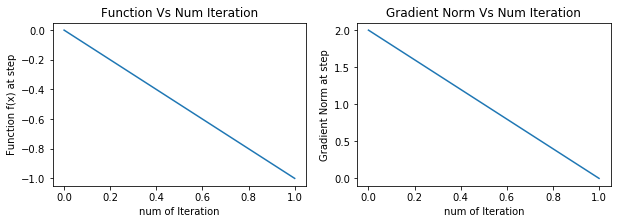

,pk,xk
0,"[-1.18182126308e-125, 2.0]","[1.0, 1.0]"


In [24]:
x1 = Symbol('x1')
x2 = Symbol('x2')
f = pow(x1,2) + 2*pow(x2,2) - 2*x1*x2 - 2*x2
deriv_1 = np.array([f.diff(x1), f.diff(x2)])
H = np.array([[deriv_1[0].diff(x1),deriv_1[0].diff(x2)],
                    [deriv_1[1].diff(x1),deriv_1[1].diff(x2)]])
# print (H)
xk = np.array([0,0])

fx_array, gradientNorm_arr, pk_arr, alpha_arr, xk1_arr = iterate(f, xk, deriv_1, H, 
                                                                 numFeatures=2, numSteps=10, should_print=1)
outData = pd.DataFrame(columns=["pk","xk"])
outData["pk"] = pk_arr
# outData["alpha"] = alpha_arr
outData["xk"] = xk1_arr

plot([dict(functionVal = fx_array), dict(gradientNorm = gradientNorm_arr)])

outData

# Solution d(3)

#######################&&&&&&&&&&&&  [[ 1330.   480.]
 [  480.   200.]]

##########################################################
Function F at x: f(x)  24.2000000000000
Gradient at xk0 is:  [-215.6  -88. ]
####### Gradient Norm:  232.867687754
The updated Value xk1 is 
 [-1.2  1. ]
#######################&&&&&&&&&&&&  [[ 1107.2725666    470.11235955]
 [  470.11235955   200.        ]]

##########################################################
Function F at x: f(x)  4.73188432526661
Gradient at xk1 is:  [-4.63781641 -0.12220679]
####### Gradient Norm:  4.63942621407
The updated Value xk2 is 
 [-1.1752809   1.38067416]
#######################&&&&&&&&&&&&  [[ 1970.82670983  -305.24594847]
 [ -305.24594847   200.        ]]

##########################################################
Function F at x: f(x)  1411.84517930947
Gradient at xk2 is:  [ 1146.45069037  -751.47563227]
####### Gradient Norm:  1370.78984945
The updated Value xk3 is 
 [ 0.76311487 -3.17503385]
#######################&

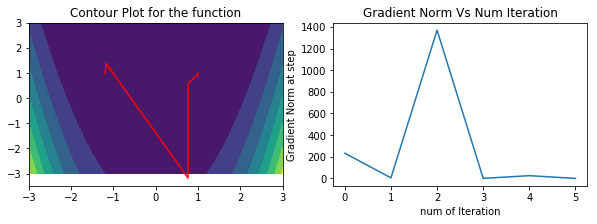

,pk,xk
0,"[215.6, 88.0]","[-1.17528089888, 1.3806741573]"
1,"[4.63781641462, 0.122206792072]","[0.763114871176, -3.17503385475]"
2,"[-1146.45069037, 751.475632272]","[0.763429678884, 0.582824775497]"
3,"[0.473110378691, 1.9820778485e-05]","[0.999995311085, 0.944027323853]"
4,"[-22.3852049948, 11.1926596677]","[0.999995695654, 0.999991391326]"


In [25]:
x1 = Symbol('x1')
x2 = Symbol('x2')
f = (-x1 + 1)**2 + 100*(-x1**2 + x2)**2
deriv_1 = np.array([f.diff(x1), f.diff(x2)])
H = np.array([[deriv_1[0].diff(x1),deriv_1[0].diff(x2)],
              [deriv_1[1].diff(x1),deriv_1[1].diff(x2)]])
# print(deriv_1)
# print(H)
xk = np.array([-1.2,1])

fx_array, gradientNorm_arr, pk_arr, alpha_arr, xk1_arr = iterate(f, xk, deriv_1, H, 
                                                                 numFeatures=2, numSteps=10, should_print=1)
outData = pd.DataFrame(columns=["pk","xk"])
outData["pk"] = pk_arr
outData["xk"] = xk1_arr

###########  Plot  ###########
x1_x2 = np.vstack(([-1.2,1], np.asarray(xk1_arr)))
u = np.linspace(-3,3,5000)
x1,x2 = np.meshgrid(u,u)
z = (-x1 + 1)**2 + 100*(-x1**2 + x2)**2
plot([dict(x1=x1, x2=x2, z=z, sol_x1=x1_x2[:,0], sol_x2=x1_x2[:,1]), dict(gradientNorm = gradientNorm_arr)], contour=True)


outData

# Solution d(4)

In [14]:
x1 = Symbol('x1')
x2 = Symbol('x2')
f = x2**2 + (x1 + x2)**4
deriv_1 = np.array([f.diff(x1), f.diff(x2)])
H = np.array([[deriv_1[0].diff(x1), deriv_1[0].diff(x2)],
                    [deriv_1[1].diff(x1),deriv_1[1].diff(x2)]])
print (H)
xk = np.array([2,-2])

# fx_array, gradientNorm_arr = iterate(f, xk, deriv_1, H, numFeatures=2, numSteps=20, should_print=2)

fx_array, gradientNorm_arr, pk_arr, alpha_arr, xk1_arr = iterate(f, xk, deriv_1, H, 
                                                                 numFeatures=2, numSteps=20, should_print=2)
outData = pd.DataFrame(columns=["pk","xk"])
outData["pk"] = pk_arr
# outData["alpha"] = alpha_arr
outData["xk"] = xk1_arr

plot([fx_array, gradientNorm_arr])

outData


# Solution d(5) :

### a)

#######################&&&&&&&&&&&&  [[ 17.  -8.]
 [ -8.  17.]]

##########################################################
Function F at x: f(x)  7.06250000000000
Gradient at xk0 is:  [  7. -11.]
####### Gradient Norm:  13.0384048104
The updated Value xk1 is 
 [ 1 -1]
#######################&&&&&&&&&&&&  [[ 10.61927901  -2.88173827]
 [ -2.88173827   6.0681679 ]]

##########################################################
Function F at x: f(x)  2.47525436168877
Gradient at xk1 is:  [ 2.028183   -3.95180001]
####### Gradient Norm:  4.44187456079
The updated Value xk2 is 
 [ 0.86222222 -0.41777778]
#######################&&&&&&&&&&&&  [[ 9.78918327  1.5271204 ]
 [ 1.5271204   4.47299444]]

##########################################################
Function F at x: f(x)  0.889990361724683
Gradient at xk2 is:  [ 1.43882305 -1.08248983]
####### Gradient Norm:  1.80055435962
The updated Value xk3 is 
 [ 0.84584565  0.22567953]
#######################&&&&&&&&&&&&  [[ 7.22314511  2.78145022]
 

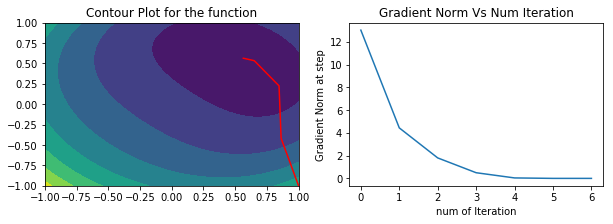

,pk,xk
0,"[-7.0, 11.0]","[0.862222222222, -0.417777777778]"
1,"[-2.02818300137, 3.95180001097]","[0.845845645135, 0.225679533486]"
2,"[-1.43882305029, 1.08248982992]","[0.650719218136, 0.534303073154]"
3,"[-0.495938391593, -0.0494055129508]","[0.571261363016, 0.562345000739]"
4,"[-0.0395663204222, -0.00773235898534]","[0.564139612591, 0.564077798412]"
5,"[-0.000297501405805, -7.83238371848e-05]","[0.564086952134, 0.56408694871]"


In [26]:
c = 1
x1 = Symbol('x1')
x2 = Symbol('x2')
f = (x1-1)**2 + (x2-1)**2 + (x1**2 + x2**2 -0.25)**2
deriv_1 = np.array([f.diff(x1), f.diff(x2)])
H = np.array([[deriv_1[0].diff(x1),deriv_1[0].diff(x2)], 
              [deriv_1[1].diff(x1),deriv_1[1].diff(x2)]])
# print(deriv_1)
# print(deriv_2)
xk = np.array([1,-1])

fx_array, gradientNorm_arr, pk_arr, alpha_arr, xk1_arr = iterate(f, xk, deriv_1, H, 
                                                                 numFeatures=2, numSteps=10, should_print=1)
outData = pd.DataFrame(columns=["pk","xk"])
outData["pk"] = pk_arr
# outData["alpha"] = alpha_arr
outData["xk"] = xk1_arr

###########  Plot  ###########
x1_x2 = np.vstack(([1,-1], np.asarray(xk1_arr)))
u = np.linspace(-1,1,10000)
x1,x2 = np.meshgrid(u,u)
z = (x1-1)**2 + (x2-1)**2 + (x1**2 + x2**2 -0.25)**2
plot([dict(x1=x1, x2=x2, z=z, sol_x1=x1_x2[:,0], sol_x2=x1_x2[:,1]), dict(gradientNorm = gradientNorm_arr)], contour=True)


outData

### b)

#######################&&&&&&&&&&&&  [[ 152.  -80.]
 [ -80.  152.]]

##########################################################
Function F at x: f(x)  34.6250000000000
Gradient at xk0 is:  [ 70. -74.]
####### Gradient Norm:  101.862652626
The updated Value xk1 is 
 [ 1 -1]
#######################&&&&&&&&&&&&  [[ 71.28847198 -37.98821215]
 [-37.98821215  65.15820378]]

##########################################################
Function F at x: f(x)  7.78084267935384
Gradient at xk1 is:  [ 19.60310348 -21.93023299]
####### Gradient Norm:  29.4145675661
The updated Value xk2 is 
 [ 0.71743295 -0.66187739]
#######################&&&&&&&&&&&&  [[ 38.78690413 -18.80505364]
 [-18.80505364  25.19475854]]

##########################################################
Function F at x: f(x)  2.77929624528782
Gradient at xk2 is:  [ 4.94174617 -6.87243959]
####### Gradient Norm:  8.46470797957
The updated Value xk3 is 
 [ 0.57869993 -0.40619181]
#######################&&&&&&&&&&&&  [[ 33.9005943   -5.

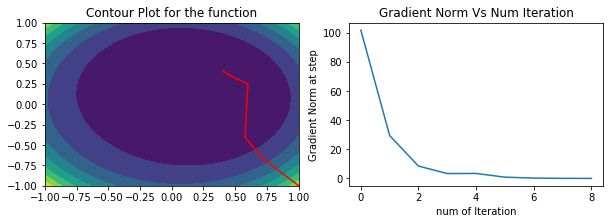

,pk,xk
0,"[-70.0, 74.0]","[0.717432950192, -0.661877394636]"
1,"[-19.6031034843, 21.9302329875]","[0.57869992721, -0.40619180924]"
2,"[-4.94174617267, 6.87243959189]","[0.586285749905, -0.127757253729]"
3,"[-1.75346929614, 2.81791673993]","[0.601237068212, 0.249455655725]"
4,"[-3.38020925863, -0.232270263273]","[0.48572383556, 0.332297428095]"
5,"[-0.843412278836, 0.0547411551608]","[0.419074488528, 0.394617825469]"
6,"[-0.201761292456, -0.0732692569316]","[0.403468484437, 0.402138112827]"
7,"[-0.00930338883259, -0.00267803818456]","[0.402612263673, 0.402608927093]"


In [27]:
c = 10
x1 = Symbol('x1')
x2 = Symbol('x2')
f = (x1 - 1)**2 + (x2 - 1)**2 + 10*(x1**2 + x2**2 - 0.25)**2
deriv_1 = np.array([f.diff(x1), f.diff(x2)])
H = np.array([[deriv_1[0].diff(x1),deriv_1[0].diff(x2)], 
              [deriv_1[1].diff(x1),deriv_1[1].diff(x2)]])
# print(deriv_1)
# print(deriv_2)
xk = np.array([1,-1])

fx_array, gradientNorm_arr, pk_arr, alpha_arr, xk1_arr = iterate(f, xk, deriv_1, H, 
                                                                 numFeatures=2, numSteps=10, should_print=1)
outData = pd.DataFrame(columns=["pk","xk"])
outData["pk"] = pk_arr
# outData["alpha"] = alpha_arr
outData["xk"] = xk1_arr

###########  Plot  ###########
x1_x2 = np.vstack(([1,-1], np.asarray(xk1_arr)))
u = np.linspace(-1,1,5000)
x1,x2 = np.meshgrid(u,u)
z = (x1 - 1)**2 + (x2 - 1)**2 + 10*(x1**2 + x2**2 - 0.25)**2
plot([dict(x1=x1, x2=x2, z=z, sol_x1=x1_x2[:,0], sol_x2=x1_x2[:,1]), dict(gradientNorm = gradientNorm_arr)], contour=True)

outData

### c)

#######################&&&&&&&&&&&&  [[ 1502.  -800.]
 [ -800.  1502.]]
#######################&&&&&&&&&&&&  [[ 678.12757236 -386.46664478]
 [-386.46664478  671.79095438]]

##########################################################
Function F at x: f(x)  54.2489151737964
Gradient at xk1 is:  [ 199.32900818 -201.68524959]
####### Gradient Norm:  283.564795778
The updated Value xk2 is 
 [ 0.69789679 -0.69219878]
#######################&&&&&&&&&&&&  [[ 319.28550398 -204.86578883]
 [-204.86578883  304.69691681]]
#######################&&&&&&&&&&&&  [[ 177.07374238 -128.1803485 ]
 [-128.1803485   143.91798396]]

##########################################################
Function F at x: f(x)  2.75444685518407
Gradient at xk3 is:  [ 11.34115659 -13.72682731]
####### Gradient Norm:  17.8058310862
The updated Value xk4 is 
 [ 0.42694527 -0.37528331]
#######################&&&&&&&&&&&&  [[ 163.98135016  -94.33307294]
 [ -94.33307294   65.58518734]]
#######################&&&&&&&&&&&&  [[ 329.29

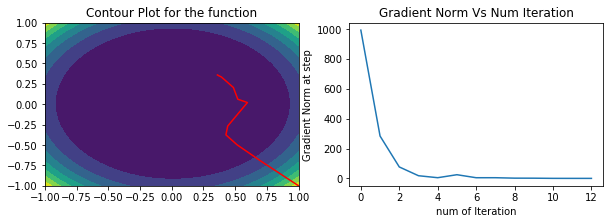

,pk,xk
0,"[-700.0, 704.0]","[0.697896787384, -0.692198781686]"
1,"[-199.329008178, 201.685249593]","[0.515133355046, -0.497118335522]"
2,"[-53.1170050803, 55.1894771638]","[0.426945269905, -0.375283313608]"
3,"[-11.3411565853, 13.7268273092]","[0.441006966759, -0.267379769627]"
4,"[-1.70076922148, 4.24375326575]","[0.596598601778, 0.0211181532851]"
5,"[-24.5786748583, 1.05917893857]","[0.520714886258, 0.0617359758426]"
6,"[-4.2392731444, 1.26027154921]","[0.48612509986, 0.204760772333]"
7,"[-4.46441119226, -0.72287489123]","[0.437813671789, 0.271461770735]"
8,"[-1.56770931765, -0.212120706226]","[0.390481190645, 0.335367941387]"
9,"[-1.11560511738, -0.675862754528]","[0.368556558134, 0.351916633866]"


In [28]:
c = 10
x1 = Symbol('x1')
x2 = Symbol('x2')
f = (x1 - 1)**2 + (x2 - 1)**2 + 100*(x1**2 + x2**2 - 0.25)**2
deriv_1 = np.array([f.diff(x1), f.diff(x2)])
H = np.array([[deriv_1[0].diff(x1),deriv_1[0].diff(x2)], 
              [deriv_1[1].diff(x1),deriv_1[1].diff(x2)]])
# print(deriv_1)
# print(deriv_2)
xk = np.array([1,-1])

fx_array, gradientNorm_arr, pk_arr, alpha_arr, xk1_arr = iterate(f, xk, deriv_1, H, 
                                                                 numFeatures=2, numSteps=20, should_print=2)
outData = pd.DataFrame(columns=["pk","xk"])
outData["pk"] = pk_arr
# outData["alpha"] = alpha_arr
outData["xk"] = xk1_arr

###########  Plot  ###########
x1_x2 = np.vstack(([1,-1], np.asarray(xk1_arr)))
u = np.linspace(-1,1,5000)
x1,x2 = np.meshgrid(u,u)
z = (x1 - 1)**2 + (x2 - 1)**2 + 100*(x1**2 + x2**2 - 0.25)**2
plot([dict(x1=x1, x2=x2, z=z, sol_x1=x1_x2[:,0], sol_x2=x1_x2[:,1]), dict(gradientNorm = gradientNorm_arr)], contour=True)

outData